In [6]:
from importlib import reload  # Python 3.4+
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from ndbc_api import NdbcApi
import concurrent.futures
from tqdm.contrib.concurrent import process_map, thread_map
from tqdm.autonotebook import tqdm
import xbuoy
from xbuoy.xbuoy import * 

SyntaxError: unterminated string literal (detected at line 300) (xbuoy.py, line 300)

### Parse all NDBC buoy observations

In [3]:
buoy_stations = xbuoy.get_buoy_stations()


AttributeError: module 'xbuoy' has no attribute 'get_buoy_stations'

### Plot buoy locations

In [ ]:
plot_stations(buoy_stations)

### Filter for California Buoys

(<Figure size 640x480 with 1 Axes>, <GeoAxes: >)

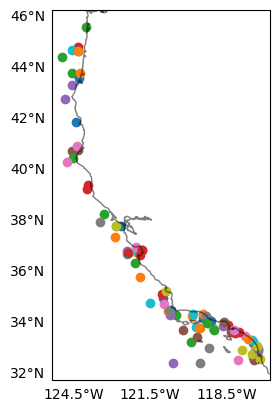

In [4]:
filtered_buoy_stations = box_filter_buoys(buoy_stations, lon1 = -125, lon2 = -115, lat1 = 20, lat2 = 46)
plot_stations(filtered_buoy_stations)

### Query all available data for California buoys between 1990 and 2016

In [6]:
# Define a range of years for which to retrieve historical records
years = range(1998, 2024)  # Example range from 1990 to 2015 inclusive

# Select a list of station IDs from the filtered dataset (here selecting the first two stations)
station_list = filtered_buoy_stations.station_id.values[0:20]

# Retrieve and process historical records for the selected stations over the specified years
xsdf = get_station_records(station_list, years)

0.0 % done
50.0 % done


In [7]:
# Add water temperature density to the dataset, representing the percentage of valid temperature data
xsdf = add_wtemp_coverage(xsdf)

# Add latitude and longitude coordinates to the dataset based on the reference dataset (filtered_ds)
xsdf = add_latitude_longitude(xsdf, filtered_buoy_stations)

Text(0, 0.5, '% Coverage between 1998 and 2023')

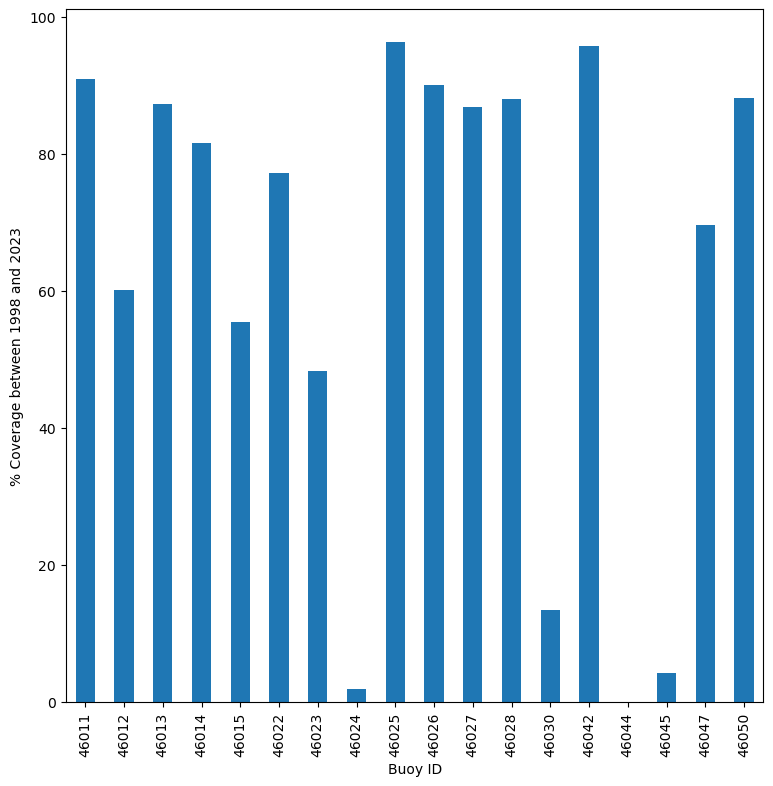

In [8]:
fig, ax = plt.subplots(figsize=(9, 9))
xsdf["wtemp_coverage"].to_series().plot.bar(ax=ax)
ax.set_xlabel("Buoy ID")
ax.set_ylabel(f"% Coverage between {years[0]} and {years[-1]}")

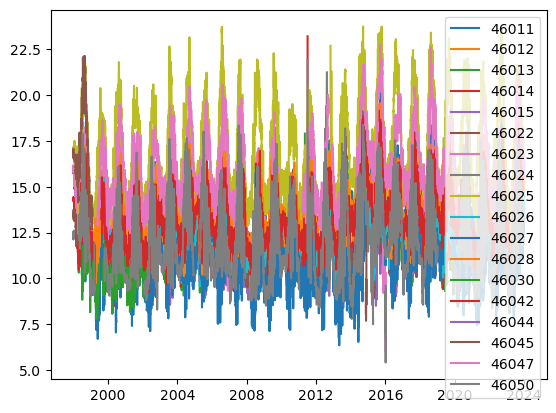

In [9]:
#plot water temperature 
fig, ax = plt.subplots()
for station in xsdf["station_id"]:
    ax.plot(xsdf.time, xsdf.WTMP.sel(station_id = station), label = station.values)
ax.legend()

In [10]:
xsdf.to_netcdf("NDBC_CC_Daily.nc")